In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series,DataFrame
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import  StandardScaler

In [100]:
### Read the data into Jupyter Environment 
Data=pd.read_csv('Cricket.csv',encoding='cp1252')
Data.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [61]:
Data.shape

(79, 13)

In [62]:
Data.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [107]:
Data.dtypes

Player     object
Span       object
Mat         int64
Inns        int64
NO          int64
Runs        int64
HS         object
Ave       float64
BF          int64
SR        float64
100         int64
50          int64
0           int64
dtype: object

In [102]:
df=pd.get_dummies(Data)
df.head()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0,...,HS_188*,HS_189,HS_189*,HS_194,HS_200*,HS_215,HS_219,HS_237*,HS_264,HS_96*
0,463,452,41,18426,44.83,21367,86.23,49,96,20,...,0,0,0,0,1,0,0,0,0,0
1,404,380,41,14234,41.98,18048,78.86,25,93,15,...,0,0,0,0,0,0,0,0,0,0
2,375,365,39,13704,42.03,17046,80.39,30,82,20,...,0,0,0,0,0,0,0,0,0,0
3,445,433,18,13430,32.36,14725,91.20,28,68,34,...,0,1,0,0,0,0,0,0,0,0
4,448,418,39,12650,33.37,16020,78.96,19,77,28,...,0,0,0,0,0,0,0,0,0,0


In [108]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Mat,79.0,245.075949,74.211716,128.00,188.000,232.00,281.500,463.00
Inns,79.0,230.544304,70.321022,127.00,177.000,217.00,261.500,452.00
NO,79.0,30.037975,14.421710,4.00,17.500,29.00,40.000,70.00
Runs,79.0,7618.139241,2551.873313,5080.00,5759.000,6798.00,8739.500,18426.00
Ave,79.0,38.523291,5.919093,23.57,34.600,37.87,41.845,53.94
BF,79.0,9684.455696,3193.835825,5504.00,7393.500,9134.00,10976.000,21367.00
SR,79.0,79.295316,9.925307,60.57,73.725,77.73,85.180,117.00
100,79.0,11.556962,8.092014,0.00,6.000,10.00,15.500,49.00
50,79.0,46.443038,16.351701,23.00,34.500,42.00,54.000,96.00
0,79.0,13.253165,5.925755,3.00,9.000,13.00,16.000,34.00


### 2. . standardize the variables 

In [123]:
### standardize the variables 
stand = StandardScaler().fit_transform(df)

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### 3. Find out the optimal number of clusters 

In [115]:
### Elbow method
ks=range(1,20)
inertia=[]

In [116]:
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(df)
    inertia.append(model.inertia_)

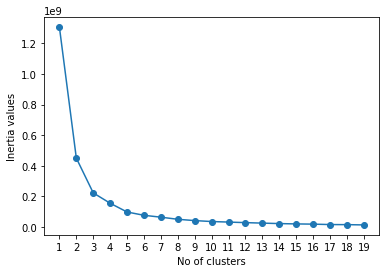

In [117]:
plt.plot(ks,inertia,'-o')
plt.xlabel('No of clusters')
plt.ylabel('Inertia values')
plt.xticks(ks)
plt.show()

### 4. Perform K-Means clustering 

In [190]:
models=KMeans(n_clusters=5,random_state=42)
models.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [191]:
labels=models.predict(df)
labels

array([3, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### 5. Attach clustered to each row 

In [192]:
Data['labels']=pd.DataFrame(labels)

### 6. Find out which cluster Chris Gayle Belongs to

In [194]:
D2=Data[Data['labels']==1].groupby('Player')['labels'].count()
print(D2)

Player
AC Gilchrist (AUS/ICC)        1
BC Lara (ICC/WI)              1
CH Gayle (ICC/WI)             1
DL Haynes (WI)                1
M Azharuddin (INDIA)          1
ME Waugh (AUS)                1
MS Atapattu (SL)              1
MS Dhoni (Asia/INDIA)         1
Mohammad Yousuf (Asia/PAK)    1
PA de Silva (SL)              1
S Chanderpaul (WI)            1
SP Fleming (ICC/NZ)           1
Saeed Anwar (PAK)             1
TM Dilshan (SL)               1
Name: labels, dtype: int64


From the above coding CH Gayle belongs to labels 1

### 7.Find out the number of players who are in Gayle Cluster

In [195]:
Gayle_cluster_no=D2.sum()
Gayle_cluster_no

14

So the number of players in Gayle Cluster is of about 14